# Import modules

In [83]:
# Data science tools
import numpy as np
import pandas as pd
import os
import cv2
import random
from glob import glob
import sklearn
from tqdm import tqdm
# Image manipulations
from PIL import Image
import skimage
from skimage import transform
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Explore the whole Data

In [30]:
# directories
datadir = './data/'
traindir = datadir + 'train/'
validdir = datadir + 'val/'
testdir = datadir + 'test/'
datasetdir = datadir + 'DataSet/' # smaller dataset of 8000 images 

In [12]:
train_imgs = os.listdir(traindir)
print(train_imgs[:5])

['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [13]:
# Empty lists
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

# Iterate through each category ie ['CNV', 'DME', 'DRUSEN', 'NORMAL']
for d in os.listdir(traindir):
    categories.append(d)

    # Number of each image
    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    # Find stats for train images
    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       'n_valid': n_valid, 'n_test': n_test}).\
    sort_values('category')

# Dataframe of training images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

In [14]:
cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()

,category,n_train,n_valid,n_test
0,CNV,37205,8,242
3,NORMAL,26315,8,242
1,DME,11348,8,242
2,DRUSEN,8616,8,242


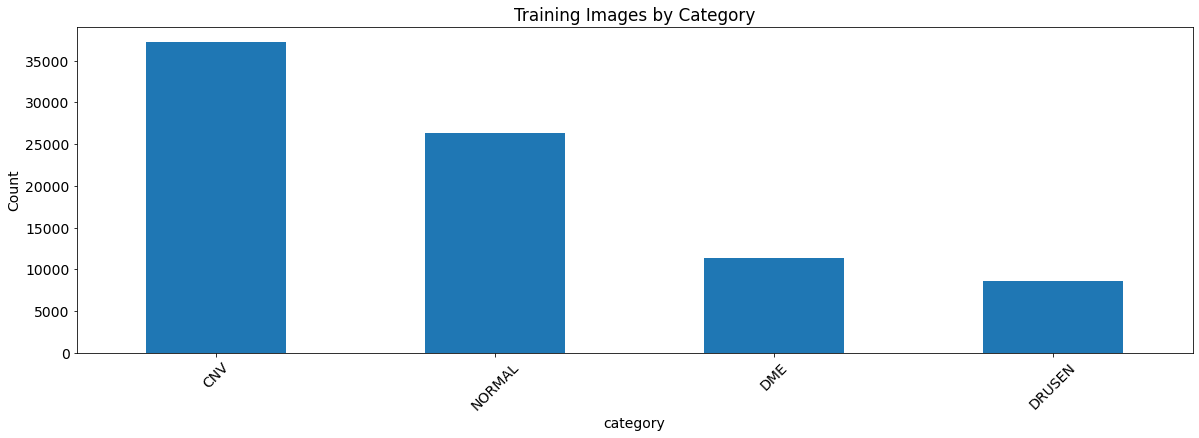

In [27]:
cat_df.set_index('category')['n_train'].plot.bar(figsize=(20, 6))
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Training Images by Category')
plt.show()

In [28]:
image_df.head()

,category,height,width
0,CNV,496,512
1,CNV,496,768
2,CNV,496,1536
3,CNV,496,512
4,CNV,496,512


# Explore the dataset (8000 images ; 2000 images of each category)

In [73]:
# Find stats for DataSet images
dataset_hs=[]
dataset_ws=[]
img_names=[]
img_categories = []
# iterate trought each image
for f in os.listdir(datasetdir):
    #print(f)
    img_names.append(f)
    img_categories.append(os.path.basename(f).split('-')[0])
    img = Image.open(datasetdir + '/' + f)
    img_array = np.array(img)
    # Shape
    dataset_hs.append(img_array.shape[0])
    dataset_ws.append(img_array.shape[1])
    

## Details about images dimensions

In [74]:
# Dataframe of datasetimages
dataset_image_df = pd.DataFrame({
    'name': img_names,
    'category' : img_categories,
    'height': dataset_hs,
    'width': dataset_ws
})
dataset_image_df.head()

,name,category,height,width
0,CNV-172472-396.jpeg,CNV,496,768
1,CNV-172472-397.jpeg,CNV,496,1536
2,CNV-172472-398.jpeg,CNV,496,1536
3,CNV-172472-399.jpeg,CNV,496,1536
4,CNV-172472-4.jpeg,CNV,496,768


In [75]:
dataset_image_df.groupby('category').describe()

height                                                        \
           count     mean       std    min    25%    50%    75%    max   
category                                                                 
CNV       2000.0  496.000  0.000000  496.0  496.0  496.0  496.0  496.0   
DME       2000.0  506.440  7.620724  496.0  496.0  512.0  512.0  512.0   
DRUSEN    2000.0  496.000  0.000000  496.0  496.0  496.0  496.0  496.0   
NORMAL    2000.0  503.632  7.993530  496.0  496.0  496.0  512.0  512.0   

           width                                                           
           count     mean         std    min    25%    50%    75%     max  
category                                                                   
CNV       2000.0  708.544  315.534361  384.0  512.0  512.0  768.0  1536.0  
DME       2000.0  584.448  223.218370  512.0  512.0  512.0  512.0  1536.0  
DRUSEN    2000.0  660.096  288.551066  512.0  512.0  512.0  768.0  1536.0  
NORMAL    2000.0  618.880  254.032257  512.0  512.0  512.0  512.0  1536.0

## Some images

(496, 768)


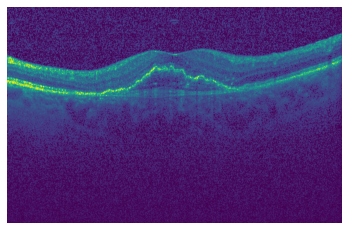

In [39]:
def imshow(image):
    """Display image"""
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# Example image
x = Image.open(datasetdir + 'CNV-172472-396.jpeg')
print(np.array(x).shape)
imshow(x)

In [66]:
# plot multiple images with cv2
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    plt.show(); 


Normal


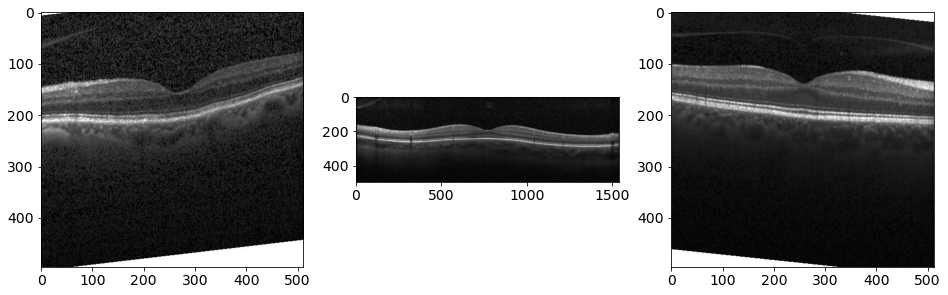

----------------------------------------
CNV


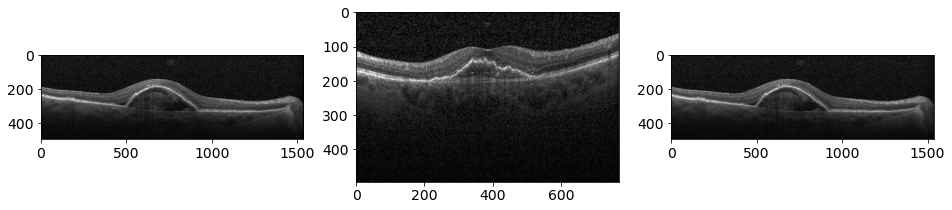

----------------------------------------
DME


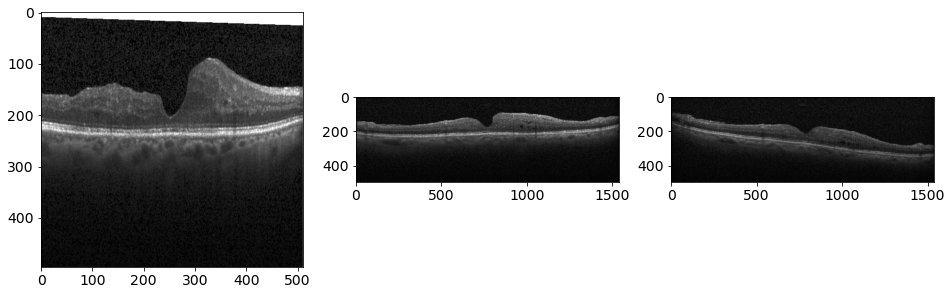

----------------------------------------
DRUSEN


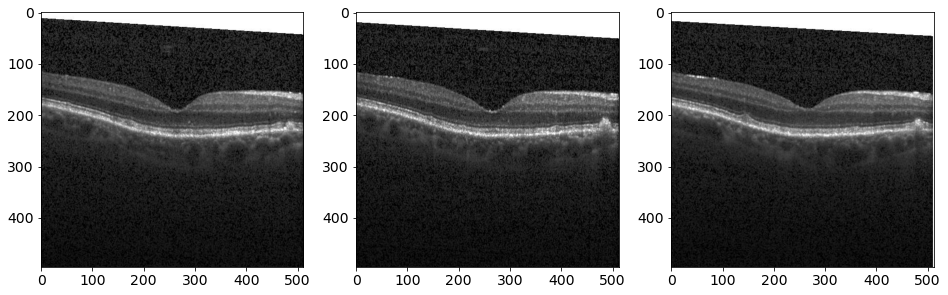

In [68]:
print("Normal")
plotThreeImages(glob(datasetdir+'/NORMAL-**')[:3])
print('----------------------------------------')
print("CNV")
plotThreeImages(glob(datasetdir+'/CNV-**')[:3])
print('----------------------------------------')
print("DME")
plotThreeImages(glob(datasetdir+'/DME-**')[:3])
print('----------------------------------------')
print("DRUSEN")
plotThreeImages(glob(datasetdir+'/DRUSEN-**')[:3])

Rmq : skyimage vs cv2 =>  OpenCV and skimage use a fundamentally different representation of images. OpenCV tends to prefer 8-bit unsigned integers in range [0..255] and skimage tends to use floats in range [0..1].

In [110]:
# pre-processing images resizing 

imgSize = 150

def resize_data(image_file_list):
    """
    load and resize the data with skimage 
    """
    X = []
    for f in tqdm(image_file_list):
        img_file = cv2.imread(datasetdir + '/' + f)
        img = skimage.transform.resize(img_file, (imgSize, imgSize))
        X.append(img)
    X = np.array(X)
    return X

In [112]:
resized_data = resize_data(img_names)

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [06:25<00:00, 20.74it/s]


In [113]:
# checking size of the data resized
resized_data.shape

(8000, 150, 150, 3)

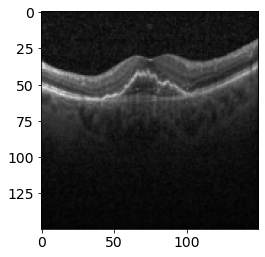

In [118]:
# one example of resized image
plt.imshow(resized_data[0])